# BMIF 201 Problem Set 1
### Michelle M. Li

## Question 1

$$\sum_{i}(1 - p_i) log(1-p_i)$$

## Question 2

### Part (a)

In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
#Simulation Function
def wf_sim(n, p_init, n_sim, t):
    simulations = []
    times_to_fixation = []
    for s in range(n_sim):
        p = p_init
        total_n_A = []
        fixated = False
        for i in range(t):
            curr_n_A = numpy.random.binomial(n, p)
            total_n_A.append(curr_n_A)
            p = curr_n_A/n
            if (p == 1 or p == 0) & (fixated == False): 
                times_to_fixation.append(i)
                fixated = True
        simulations.append(total_n_A)
    return(simulations, times_to_fixation)

#Entropy function (for allele A and allele B)
def S(n_A, N):
    n_B = N - n_A
    p_A = (n_A)/N
    p_B = (n_B)/N
    return -(p_A*numpy.log(p_A) + p_B*numpy.log(p_B))

#Time to fixation function (for 2 alleles)
def T(n_pop, n_A):
    return 2*n_pop*S(n_A, n_pop)

#Calculate expectations and variances
def wf_sim_expvar(curr_n, list_p, n_sim, t):
    expectations = []
    variances = []
    for curr_p in list_p:
        simulations, times_to_fixation = wf_sim(curr_n, curr_p, n_sim, t)
        expectations.append(numpy.mean(times_to_fixation))
        variances.append(numpy.var(times_to_fixation))
    return expectations, variances

### Example:
To demonstrate my results for running $1000$ simulations for $1000$ generations, where $n = 100, p = 0.5$:

In [18]:
#Simulation
simulations, times_to_fixation = wf_sim(n = 100, p_init = 0.5, n_sim = 1000, t = 1000)

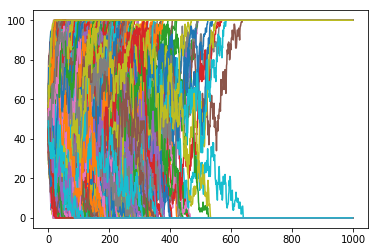

In [19]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [20]:
#Expected time to fixation
T(n_pop = 100, n_A = 50)

138.62943611198907

In [21]:
#Observed mean time to fixation
numpy.mean(times_to_fixation)

136.212

In [22]:
#Observed variance to fixation
numpy.var(times_to_fixation)

9789.709056000002

### Simulations

In [6]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 1000
t = 1000

In [117]:
#Run N = 10 simulation
expectations_N10, variances_N10 = wf_sim_expvar(curr_n = 10, list_p = p, n_sim = n_sim, t = t)

In [147]:
#Run N = 50 simulation
expectations_N50, variances_N50 = wf_sim_expvar(curr_n = 50, list_p = p, n_sim = n_sim, t = t)

In [120]:
#Run N = 100 simulation
expectations_N100, variances_N100 = wf_sim_expvar(curr_n = 100, list_p = p, n_sim = n_sim, t = t)

In [153]:
#Run N = 500 simulation
expectations_N500, variances_N500 = wf_sim_expvar(curr_n = 500, list_p = p, n_sim = n_sim, t = t)

In [123]:
#Run N = 1000 simulation
expectations_N1000, variances_N1000 = wf_sim_expvar(curr_n = 1000, list_p = p, n_sim = n_sim, t = t)

In [156]:
#Run N = 2500 simulation
expectations_N2500, variances_N2500 = wf_sim_expvar(curr_n = 2500, list_p = p, n_sim = n_sim, t = t)

In [142]:
#Run N = 5000 simulation
expectations_N5000, variances_N5000 = wf_sim_expvar(curr_n = 5000, list_p = p, n_sim = n_sim, t = t)

### **Interpretation:** Variance in fixation time as a function of starting allele frequency

The variance in fixation time for a given population as a function of the starting allele frequency shifts from a unimodal distribution to a bimodal distribution.

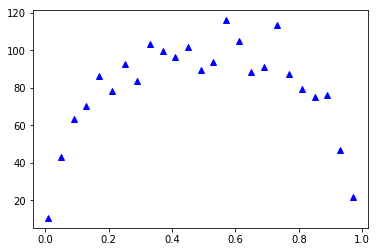

In [118]:
#Variances at N = 10
plt.plot(p, numpy.array(variances_N10).T, 'b^')
plt.show()

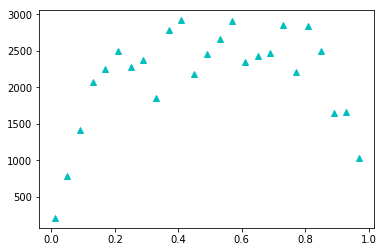

In [151]:
#Variances at N = 50
plt.plot(p, numpy.array(variances_N50).T, 'c^')
plt.show()

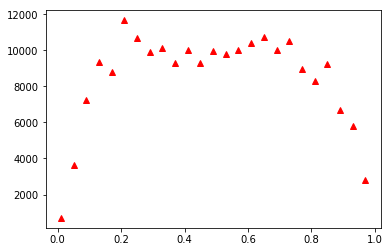

In [121]:
#Variances at N = 100
plt.plot(p, numpy.array(variances_N100).T, 'r^')
plt.show()

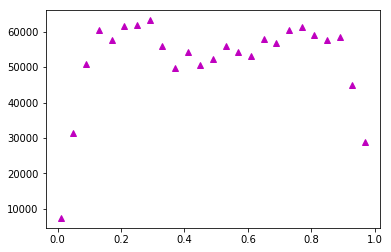

In [154]:
#Variances at N = 500
plt.plot(p, numpy.array(variances_N500).T, 'm^')
plt.show()

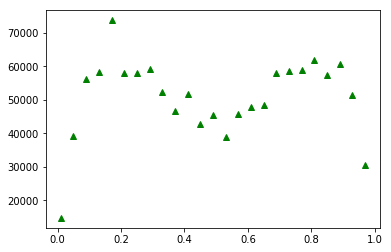

In [124]:
#Variances at N = 1000
plt.plot(p, numpy.array(variances_N1000).T, 'g^')
plt.show()

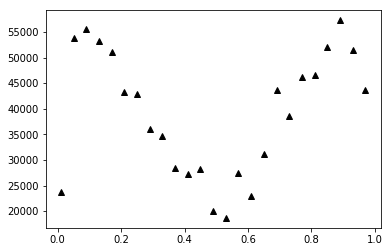

In [157]:
#Variances at N = 2500
plt.plot(p, numpy.array(variances_N2500).T, 'k^')
plt.show()

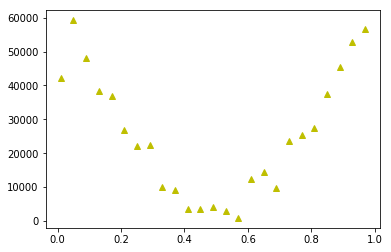

In [143]:
#Variances at N = 5000
plt.plot(p, numpy.array(variances_N5000).T, 'y^')
plt.show()

### **Interpretation:** Expected fixation time as a function of starting allele frequency

Expected fixation time for a given population as a function of the starting allele frequency follows a similar unimodal distribution, but scaled on the y-axis by some constant $c$ (due to the linearity of expectation). The constant $c$ is a function of the population size.

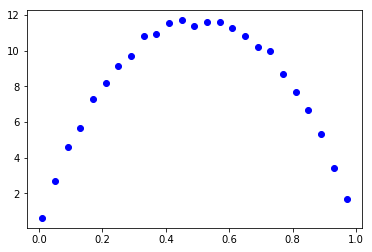

In [119]:
#Expectations at N = 10
plt.plot(p, numpy.array(expectations_N10).T, 'bo')
plt.show()

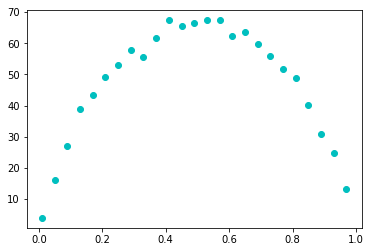

In [152]:
#Expectations at N = 50
plt.plot(p, numpy.array(expectations_N50).T, 'co')
plt.show()

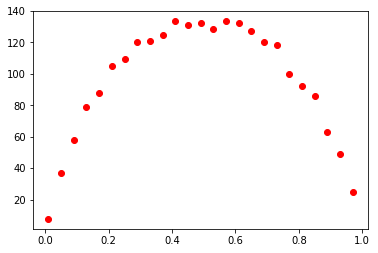

In [122]:
#Expectations at N = 100
plt.plot(p, numpy.array(expectations_N100).T, 'ro')
plt.show()

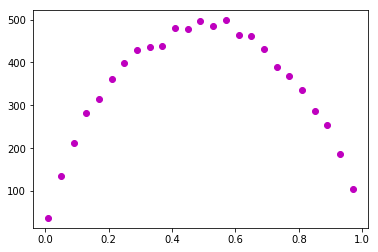

In [155]:
#Expectations at N = 500
plt.plot(p, numpy.array(expectations_N500).T, 'mo')
plt.show()

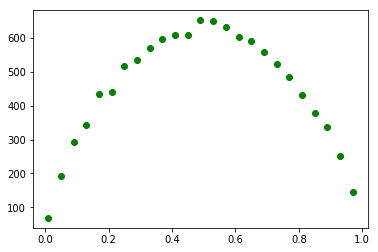

In [125]:
#Expectations at N = 1000
plt.plot(p, numpy.array(expectations_N1000).T, 'go')
plt.show()

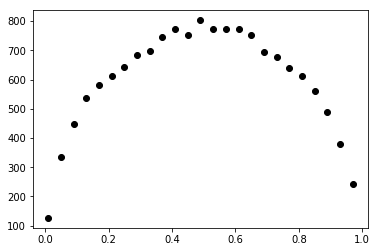

In [158]:
#Expectations at N = 2500
plt.plot(p, numpy.array(expectations_N2500).T, 'ko')
plt.show()

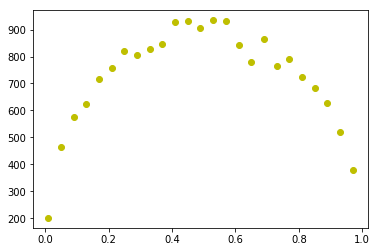

In [144]:
#Expectations at N = 5000
plt.plot(p, numpy.array(expectations_N5000).T, 'yo')
plt.show()

## Part (b)

In [7]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 1000
t = 1000

In [8]:
#Simulation Function
def wf_sim_ext(n, p_init, n_sim, t):
    total_fix_count = 0
    times_to_extinction = []
    for s in range(n_sim):
        p = p_init
        fixated = False
        for i in range(t):
            curr_n_A = numpy.random.binomial(n, p)
            p = curr_n_A/n
            if (p == 1) & (fixated == False): 
                total_fix_count += 1
                fixated = True
            if (p == 0) & (fixated == False): 
                times_to_extinction.append(i)
                total_fix_count += 1
                fixated = True
    return(times_to_extinction, total_fix_count)

#Calculate expectations and variances
def wf_sim_exp_ext(curr_n, list_p, n_sim, t):
    expectations = []
    extinction_freq = []
    for curr_p in list_p:
        times_to_extinction, total_fix_count = wf_sim_ext(curr_n, curr_p, n_sim, t)
        expectations.append(numpy.mean(times_to_extinction))
        extinction_freq.append(len(times_to_extinction)/total_fix_count)
    return expectations, extinction_freq

In [9]:
#Run N = 10 simulation
expectations_N10_ext, extinction_freq_N10 = wf_sim_exp_ext(curr_n = 10, list_p = p, n_sim = n_sim, t = t)

In [10]:
#Run N = 50 simulation
expectations_N50_ext, extinction_freq_N50 = wf_sim_exp_ext(curr_n = 50, list_p = p, n_sim = n_sim, t = t)

In [11]:
#Run N = 100 simulation
expectations_N100_ext, extinction_freq_N100 = wf_sim_exp_ext(curr_n = 100, list_p = p, n_sim = n_sim, t = t)

In [12]:
#Run N = 500 simulation
expectations_N500_ext, extinction_freq_N500 = wf_sim_exp_ext(curr_n = 500, list_p = p, n_sim = n_sim, t = t)

In [13]:
#Run N = 1000 simulation
expectations_N1000_ext, extinction_freq_N1000 = wf_sim_exp_ext(curr_n = 1000, list_p = p, n_sim = n_sim, t = t)

In [14]:
#Run N = 1500 simulation
expectations_N1500_ext, extinction_freq_N1500 = wf_sim_exp_ext(curr_n = 1500, list_p = p, n_sim = n_sim, t = t)

/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
#Run N = 2500 simulation
expectations_N2500_ext, extinction_freq_N2500 = wf_sim_exp_ext(curr_n = 2500, list_p = p, n_sim = n_sim, t = t)

/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
#Run N = 5000 simulation
expectations_N5000_ext, extinction_freq_N5000 = wf_sim_exp_ext(curr_n = 5000, list_p = p, n_sim = n_sim, t = t)

/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


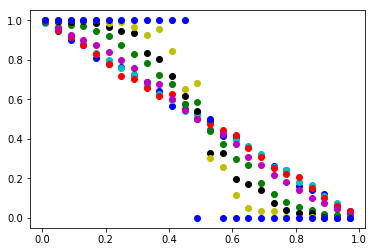

In [17]:
#Extinction Frequencies
plt.plot(p, numpy.array(extinction_freq_N10).T, 'bo',
         p, numpy.array(extinction_freq_N50).T, 'co',
         p, numpy.array(extinction_freq_N100).T, 'ro',
         p, numpy.array(extinction_freq_N500).T, 'mo',
         p, numpy.array(extinction_freq_N1000).T, 'go',
         p, numpy.array(extinction_freq_N1500).T, 'ko',
         p, numpy.array(extinction_freq_N2500).T, 'yo',
         p, numpy.array(extinction_freq_N5000).T, 'bo')
plt.show()

In [18]:


TO DO !!!!!!!



SyntaxError: invalid syntax (<ipython-input-18-bd6f95cc2ab1>, line 3)

### **Interpretation:** Expected time to extinction as a function of starting allele frequency

## Question 3

### Part (a)

The average fitness $\bar{W}$ is
$$\bar{W} = 2p(1 - p)(1 + s) + (1 - p)^2$$

The equilibrium frequency is when $\Delta p = 0$,
$$\Delta p = p^2 \frac{W_{AA}}{\bar{W}} + p(1 - p) \frac{W_{Aa}}{\bar{W}} - p = 0$$

So, to solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 4
$$2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2 = (1 - \widetilde{p})(1 + s)$$

Step 5
$$2\widetilde{p}(1 + s) + (1 - \widetilde{p}) = 1 + s$$

Step 6
$$2\widetilde{p} + 2\widetilde{p}s - \widetilde{p} = s$$

Step 7
$$\widetilde{p}(1 + 2s) = s$$

Step 8
$$\widetilde{p} = \frac{s}{1 + 2s}$$

### Part (b)

The average fitness $\bar{W}$ is
$$\bar{W} = p^2(1 + s) + 2p(1 - p)(1 - s^2) + (1 - p)^2$$

To solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{\widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 4
$$\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2 = \widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)$$

Step 5
$$(1 + s)(\widetilde{p}^2 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 6
$$-(1 + s)\widetilde{p}(1 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 7
$$-(1 + s)\widetilde{p} + (1 - \widetilde{p}) = (1 - s^2)(1 - 2\widetilde{p})$$

Step 8
$$-\widetilde{p} - \widetilde{p}s + 1 - \widetilde{p} = 1 - 2\widetilde{p} - s^2 + 2\widetilde{p}s^2$$

Step 9
$$-\widetilde{p}s = -s^2 + 2\widetilde{p}s^2$$

Step 10
$$-\widetilde{p} - 2\widetilde{p}s = -s$$

Step 11
$$\widetilde{p}(-1 - 2s) = -s$$

Step 12
$$\widetilde{p} = \frac{s}{1 + 2s}$$

### Part (c)

In [19]:


TO DO !!!!


SyntaxError: invalid syntax (<ipython-input-19-403682408c84>, line 3)

## Question 4

### Part (a)

Let the probability of picking $j$ number of A alleles at time $t$ given that there are $i$ number of A alleles at time $t - 1$ be
$$P(X_t = j \vert X_{t-1} = i) = \binom{2N}{j}p^j(1 - p)^{2N - j}$$
where $2N$ is the population size (diploid), and $p$ is the probability of choosing an A allele.

The probability of choosing an A allele is
$$p = \frac{i}{2N}(1 - \mu) + (1 - \frac{i}{2N})\mu$$
where $\frac{i}{2N}(1 - \mu)$ is the probability of choosing an A allele and not mutating it, and $(1 - \frac{i}{2N})\mu$ is the probability of not choosing an A allele and mutating it into an A allele.

With a fitness advantage of $\bar{W} = 1.01$, 
$$p' = 1.01p = 1.01\left(\frac{i}{2N}(1 - \mu) + (1 - \frac{i}{2N})\mu\right)$$

The equilibrium is
$$H = \frac{4Np'}{1 + 4Np' + 4p'}$$

Given $N = 100$, $p = 0.5$, $\mu = 0.001$, and $\bar{W} = 1.01$,
$$p' = 1.01\left(0.5(1 - 0.001) + 0.5*0.001\right)$$
which simplifies into
$$p' = 0.505$$
Now, solving for equilibrium,
$$H = \frac{4*100*0.505}{1 + 4*100*0.505 + 4*0.505} = \frac{202}{205.02} $$
Finally,
$$H = 0.985$$

In [331]:
#Simulation Function
def wf_sim_mut(n, p_init, n_sim, t, mu, w):
    simulations = []
    equilibrium = []
    for s in range(n_sim):
        
        
        p = p_init*(1 - mu) + (1 - p_init)*mu

        total_n_A = []
        fixated = False
        for i in range(t):
            if (p > 1): p = round(p)
            curr_n_A = numpy.random.binomial(n, p)
            total_n_A.append(curr_n_A)
            
            p = w*( (curr_n_A/n)*(1 - mu) + (1 - curr_n_A/n)*mu)
            
            #if (p >= 1 or p == 0) & (fixated == False): fixated = True
        #if (fixated == False) & (curr_n_A > 0) & (curr_n_A < n): 
        
        if (curr_n_A > 0) & (curr_n_A < n): 
            equilibrium.append(curr_n_A)
        simulations.append(total_n_A)
    return(simulations, equilibrium)


In [380]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 100*2, p_init = 0.5, n_sim = 2000, t = 1000, mu = 0.001, w = 1.01)

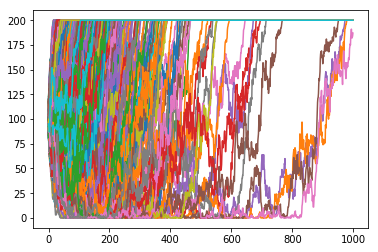

In [381]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

### Part (b)

How does the equilibrium change if the population is $N = 10000$? 

In [398]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 2000, mu = 0.001, w = 1)

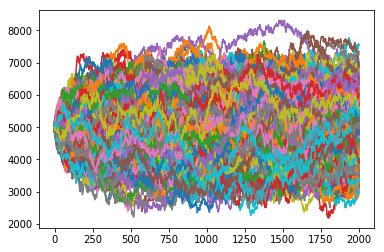

In [399]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [384]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 200, mu = 0.001, w = 1.01)

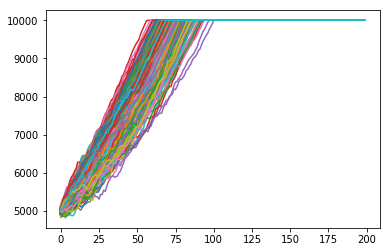

In [385]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

How does the equilibrium change with mutation rate $\mu$ and fitness $w$? 

In [386]:
#Run mu = 0.001, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 20, mu = 0.001, w = 1.05)

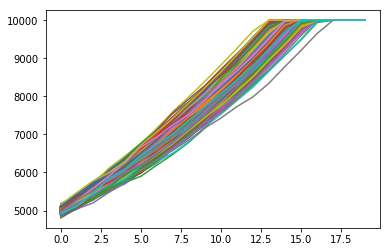

In [387]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [388]:
#Run mu = 0.005, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 150, mu = 0.005, w = 1.01)

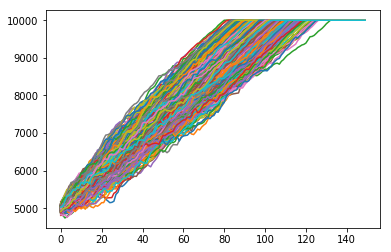

In [389]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [400]:
#Run mu = 0.005, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 20, mu = 0.005, w = 1.05)

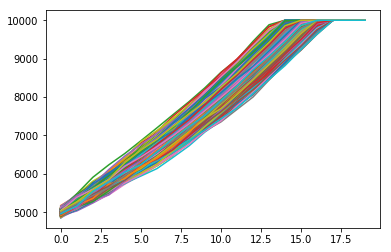

In [401]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [402]:
#Run mu = 0.01, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 5000, mu = 0.01, w = 1.01)

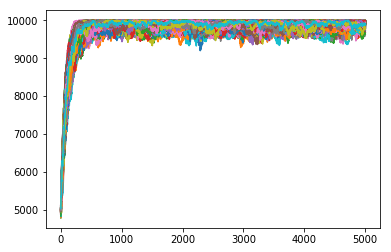

In [403]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [404]:
#Run mu = 0.01, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 200, mu = 0.01, w = 1.05)

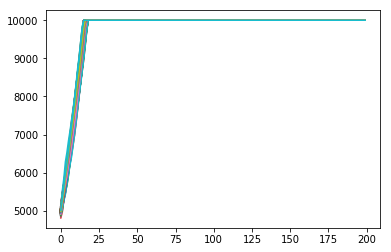

In [405]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [406]:
#Run mu = 0.01, w = 1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 5000, mu = 0.01, w = 1)

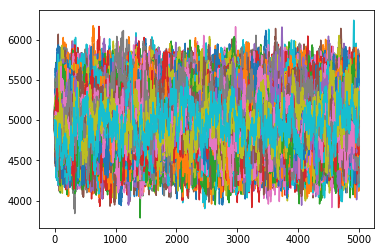

In [407]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [408]:
#Run mu = 0.05, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 5000, mu = 0.05, w = 1.01)

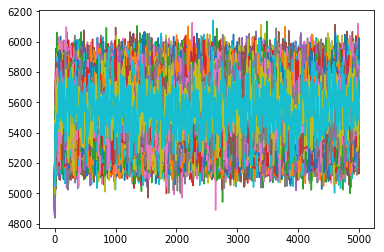

In [409]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [412]:
#Run mu = 0.05, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 5000, mu = 0.05, w = 0.5)

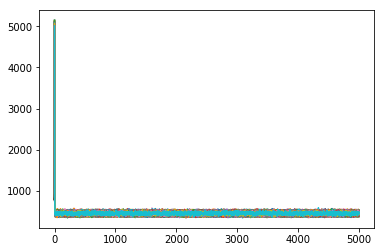

In [413]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

In [416]:
#Run mu = 0.5, w = 0.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 5000, mu = 0.5, w = 0.5)

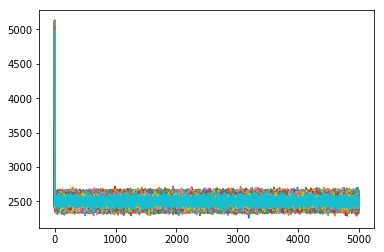

In [417]:
#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.show()

## Question 5

### Part (a)

Geometric distribution

### Part (b)

Poisson distribution

### Part (c)